### 載入套件

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import warnings
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, silhouette_visualizer
from matplotlib.colors import ListedColormap

In [2]:
if not sys.warnoptions:
    warnings.simplefilter("ignore")

### 匯入資料

In [3]:
data = pd.read_csv("/kaggle/input/customer-personality-analysis/marketing_campaign.csv", sep="\t")
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


### 檢視資料

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### 將缺失值刪除

In [5]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

### 重製索引

In [6]:
data = data.reset_index(drop=True)
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2212,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2213,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2214,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


### 日期格式

In [7]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


## 特徵工程

In [8]:
latest_date = max(date for date in data["Dt_Customer"])
print(latest_date.year)

2014


In [9]:
data["Age"] = latest_date.year - data["Year_Birth"]

In [10]:
data["Spending"] = data["MntWines"] + data["MntFruits"] + data["MntMeatProducts"] + data["MntFishProducts"] + data["MntSweetProducts"] + data["MntGoldProds"]

In [11]:
data["Marital_Status"] = data["Marital_Status"].replace({"Married":"Couple", "Together":"Couple", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

In [12]:
data["Children"] = data["Kidhome"] + data["Teenhome"]

In [13]:
data["Family_Size"] = data["Marital_Status"].replace({"Alone": 1, "Couple":2})+ data["Children"]

In [14]:
data["Has_Child"] = np.where(data.Children > 0, 1, 0)

In [15]:
data["Seniority"] = pd.to_numeric(data["Dt_Customer"].apply(lambda x: (latest_date - x)).dt.days, downcast="integer") / 30

In [16]:
data['Campaign'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5'] + data['Response']

In [17]:
data["Education"] = data["Education"].replace({"Basic":"Undergraduate", "2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

In [18]:
data = data.rename(columns={"MntWines": "Wines", "MntFruits":"Fruits", "MntMeatProducts":"Meat", "MntFishProducts":"Fish", "MntSweetProducts":"Sweets", "MntGoldProds":"Gold"})

In [19]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Spending', 'Children', 'Family_Size', 'Has_Child', 'Seniority',
       'Campaign'],
      dtype='object')

### 選取所需特徵

In [20]:
data = data[["Education", "Income", "Recency", "Wines", "Fruits",
             "Meat", "Fish", "Sweets", "Gold", "Age", "Spending", 
             "Marital_Status", "Children", "Family_Size", 
             "Has_Child", "Seniority", "Campaign",
             "NumDealsPurchases", "NumWebPurchases",
             "NumCatalogPurchases", "NumStorePurchases"]]
data.describe()

,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,Age,Spending,Children,Family_Size,Has_Child,Seniority,Campaign,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,45.179603,607.075361,0.947202,2.592509,0.714350,17.066877,0.448556,2.323556,4.085289,2.671029,5.800993
std,25173.076661,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,11.985554,602.900476,0.749062,0.905722,0.451825,7.748968,0.892440,1.923716,2.740951,2.926734,3.250785
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35303.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,37.000000,69.000000,0.000000,2.000000,0.000000,11.333333,0.000000,1.000000,2.000000,0.000000,3.000000
50%,51381.500000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,44.000000,396.500000,1.000000,3.000000,1.000000,17.100000,0.000000,2.000000,4.000000,2.000000,5.000000
75%,68522.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,55.000000,1048.000000,1.000000,3.000000,1.000000,22.866667,1.000000,3.000000,6.000000,4.000000,8.000000
max,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,121.000000,2525.000000,3.000000,5.000000,1.000000,35.433333,5.000000,15.000000,27.000000,28.000000,13.000000


### 了解變數之間的關係

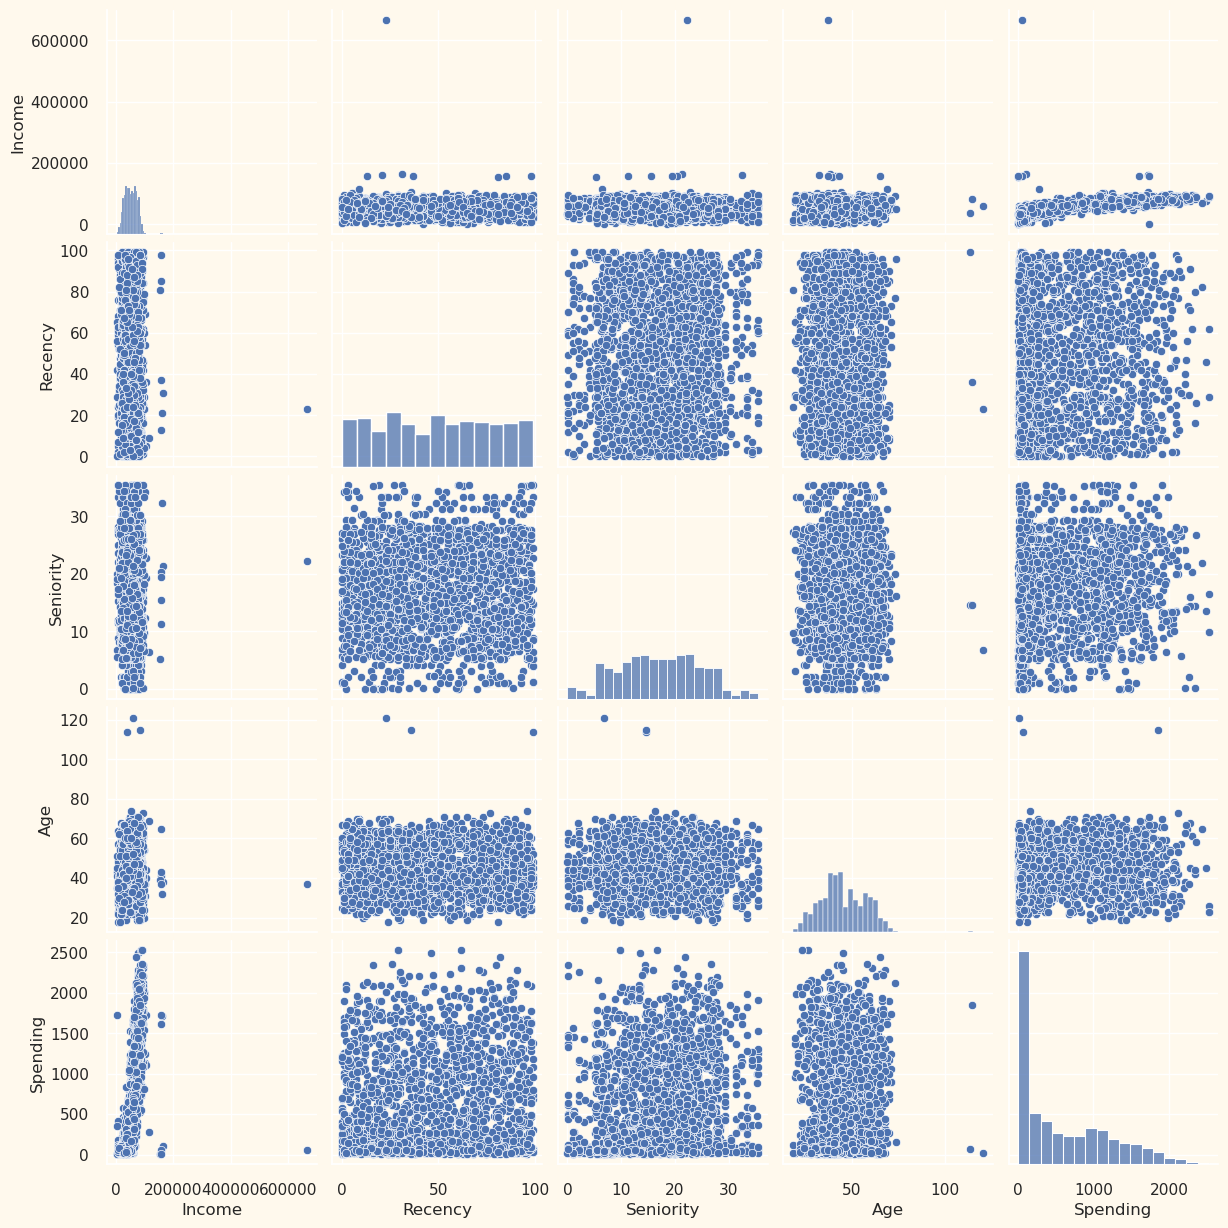

In [21]:
sns.set_theme(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})

To_Plot = [ "Income", "Recency", "Seniority", "Age", "Spending"]
sns.pairplot(data[To_Plot], palette= (["#000079","#0080FF"]), markers=["o","D"])

plt.show()

### 刪除outlier

In [ ]:
data = data[(data["Age"] < 90)]
data = data[(data["Income"] < 600000)]

data.describe()

The data is clean now

## 資料前處理

### Lable Encoding

In [ ]:
object_cols = [col for col in data.columns if data[col].dtypes == "object"]
LE = LabelEncoder()
data[object_cols] = data[object_cols].apply(LE.fit_transform)

data

### 標準化

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns=data.columns)

scaled_data.head()

### Principal Component Analysis 

In [ ]:
plt.figure(figsize=(8,6))  
pca = PCA(n_components = None)
scaled_data= pca.fit_transform(scaled_data)
var_ratio = pca.explained_variance_ratio_
cum_var_ratio = np.cumsum(var_ratio)

plt.bar(range(0,len(var_ratio)),var_ratio,alpha=0.5,
       label = "individual explained variance")
plt.step(range(0,len(cum_var_ratio)),cum_var_ratio,where="mid",
        label = "cumulative explained variance")
plt.ylabel("Explained variance ratio")
plt.xlabel("Principal component index")
plt.legend(loc="best")
plt.tight_layout()
plt.show

In [ ]:
pca = PCA(n_components=8)
PCA_ds = pca.fit_transform(scaled_data)

## Clustering

### Elbow Method 

In [ ]:
Elbow_M = KElbowVisualizer(KMeans(), k=10, timings=False)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [ ]:
Elbow_M = KElbowVisualizer(KMeans(), metric="silhouette", k=10, timings=False)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

### Silhouette Plot

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(15,8))
k_means_range = range(2, 8)

for i in k_means_range:
    row, col = divmod(i, 2)
    silhouette_visualizer(KMeans(i, random_state=42), PCA_ds, ax=ax[row-1][col], colors="yellowbrick", show=False)

fig.tight_layout()

In [ ]:
km = KMeans(n_clusters= 4, init='k-means++', random_state= 42)
clusters_pred = km.fit_predict(PCA_ds)
data["Clusters"]= clusters_pred

## Evaluation

### 單變數_類別變數分析

In [ ]:
pal = ["#000079","#D2E9FF", "#0080FF","#2828FF"]
sns.countplot(x=data["Clusters"], palette=pal).set_title("Distribution Of The Clusters")

plt.show()

In [ ]:
pl = sns.countplot(data=data, x="Campaign", hue="Clusters", palette=pal)
pl.set(title="Count Of Promotion Accepted", xlabel="Number Of Total Accepted Promotions")
plt.show()

In [ ]:
sns.countplot(data=data, x="Marital_Status", hue="Clusters", palette=pal)

In [ ]:
sns.countplot(data=data, x="Has_Child", hue="Clusters", palette=pal)

In [ ]:
sns.countplot(data=data, x="Family_Size", hue="Clusters", palette=pal)

### 單變數_連續變數分析

In [ ]:
sns.boxenplot(data=data, x="Clusters", y="Spending", palette=pal)

plt.show()

In [ ]:
sns.boxenplot(data=data, x="Clusters", y="Age", palette=pal)

plt.show()

In [ ]:
sns.boxenplot(data=data, x="Clusters", y="Income", palette=pal)

plt.show()

In [ ]:
sns.boxplot(data=data, x="Clusters", y="Recency", palette=pal)

plt.show()

In [ ]:
purchase_channel = ["NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"]
fig, ax = plt.subplots(2, 2, figsize=(15,8))

for i, channel in enumerate(purchase_channel):
    row, col = divmod(i, 2)
    sns.boxenplot(data=data, x="Clusters",y=channel , ax=ax[row][col], palette=pal)

plt.tight_layout()
plt.show()

In [ ]:
merchaindices = ["Wines", "Fruits", "Meat", "Fish", "Sweets", "Gold"]
fig, ax = plt.subplots(3, 2, figsize=(15,15))

for i, v in enumerate(merchaindices):
    row, col = divmod(i, 2)
    sns.boxenplot(data=data, x="Clusters", y=v, ax=ax[row][col], palette=pal)

plt.tight_layout()
plt.show()

###  雙變數分析_"Spending"和"Income"之間的關係

In [ ]:
sns.scatterplot(data=data, x="Spending", y="Income", hue="Clusters", palette=pal)
plt.title("Cluster's Profile Based On Income And Spending")

plt.show()